<a href="https://colab.research.google.com/github/raym2828/Span-ASTE/blob/main/2023_06_04_falcon_7b_instruct_langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT License

Copyright (c) 2023 Pavel Shibanov [https://blog.experienced.dev](https://blog.experienced.dev/falcon-7b-instruct-the-open-source-chatgpt-alternative-with-langchain-on-google-colab/?utm_source=colab&utm_medium=notebook&utm_content=falcon-7b-instruct)

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

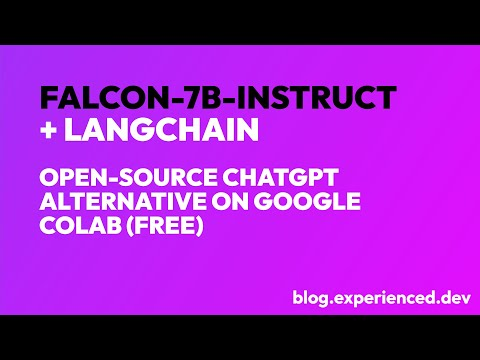

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('3yYTXHxCxz8', width="560", height="315")

In [2]:
!nvidia-smi

Sat Sep  2 22:07:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
%pip install transformers accelerate einops langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.1 MB/s eta 0:00:00


In [4]:
from transformers import AutoTokenizer

model = "tiiuae/falcon-7b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model)

In [5]:
import torch
import transformers

pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=200,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.eos_token_id,
)

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modelling_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
from langchain import HuggingFacePipeline

llm = HuggingFacePipeline(pipeline=pipeline)

In [7]:
from IPython.core.display import display, HTML


def display_result(question, result):
    display(HTML(f"<h3>{question}</h3><p>{result}</p>"))

In [8]:
question = "Write a dystopian story about a society where computers were banned."
result = llm(question)
display_result(question, result)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1411: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(


In [9]:
from langchain import PromptTemplate, LLMChain

template = """Question: {question}
Answer: Let's think step by step."""
prompt = PromptTemplate(template=template, input_variables=["question"])
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [10]:
questions = [
    "Who proved the Efficient Market Hypothesis?",
    "Who disproved the Efficient Market Hypothesis?",
    "Who proved the Poincaré conjecture for n >= 5?",  # Stephen Smale
    "Who proved the Poincaré conjecture for n = 4?",  # Michael Freedman
    "Who proved the Poincaré conjecture for n = 3?",  # Grigori Perelman
    "Is the sum of all natural numbers equal to -1/12?",
]

In [25]:
from langchain import PromptTemplate, LLMChain

template = """Question: Given the text: {text}, what are the aspect terms in it ?
What are the aspect terms in the text: {text} ?
Answer: Return JSON format."""
prompt = PromptTemplate(template=template, input_variables=["text"])
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [27]:
from langchain import PromptTemplate, LLMChain

template = """Question: Given the text: {text}, what are the aspect terms in it ?
Answer: Return information in json format."""
prompt = PromptTemplate(template=template, input_variables=["text"])
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [28]:
for question in text:
    result = llm_chain.run(question)
    display_result(question, result)

In [12]:
prompt_template = PromptTemplate.from_template(
    "Tell me a {adjective} joke about {content}."
)
prompt_template.format(adjective="funny", content="chickens")

'Tell me a funny joke about chickens.'

In [13]:

prompt_template = PromptTemplate.from_template(
"Tell me a joke"
)
prompt_template.format()

'Tell me a joke'

ASBA **extractions**

In [30]:
from langchain import PromptTemplate, LLMChain

template = """Provide the aspect based sentiment given the text: {text} .

Question: What is the aspect based sentiment analysis for the {text}?

Answer: """
prompt = PromptTemplate(template=template, input_variables=["text"])
llm_chain = LLMChain(prompt=prompt, llm=llm)



In [31]:
text = [
    "My sushi is great but the drinks were bad at komotory restauraunt"
]

In [33]:
# for question in text:
result = llm_chain.run(question)
display_result(question, result)